This notebook runs a pipeline with the following steps:
* Create a test Visibility dataset.
   * No visibility sample noise. Just testing that things are working exactly as expected.
   * Using the GLEAM sky model and a common everybeam station beam model.
   * Add complex Gaussian noise corruptions to station gains and leakage.
   * Impose a $\lambda^{2}$-dependent rotate on each station Jones matrix.
   * Write to disk in MSv2 format.
* Read MSv2 data into Visibility dataset.$^{*}$
* Predict model visibilities (using GLEAM and everybeam).$^{*}$
* Do polarised bandpass calibration.$^{*}$
* Fit for the  $\lambda^{2}$-dependent rotation of each station.
* Redo polarised bandpass calibration.$^{*}$
* Check for convergence.$^{*}$

\* xarray dataset map_blocks() is used to distribute frequency sub-bands across dask tasks.

In [1]:
from time import perf_counter

from ska_sdp_instrumental_calibration.workflow.pipelines import (
    bandpass_polarisation,
)

<frozen abc>:106: FutureWarning: xarray subclass Visibility should explicitly define __slots__


2024-12-16 11:27:21,379 - workflow.pipeline_config - INFO - Simulating demo MSv2 input
2024-12-16 11:27:21,380 - workflow.pipeline_config - INFO - Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms
2024-12-16 11:27:21,381 - workflow.pipeline_config - INFO - Generating a demo MSv2 Measurement Set demo.ms
2024-12-16 11:27:21,383 - workflow.pipeline_config - INFO - Generating LSM for simulation with:
2024-12-16 11:27:21,384 - workflow.pipeline_config - INFO -  - Catalogue file: /data/EOS_1/mit183/gleamegc.dat
2024-12-16 11:27:21,384 - workflow.pipeline_config - INFO -  - Search radius: 5.0 deg
2024-12-16 11:27:21,386 - workflow.pipeline_config - INFO -  - Flux limit: 1 Jy
2024-12-16 11:27:22,003 - processing_tasks.lsm - INFO - extracted 37 GLEAM components
2024-12-16 11:27:22,004 - workflow.pipeline_config - INFO - LSM: found 37 components
2024-12-16 11:27:22,014 - workflow.utils - INFO - Using AA2-Low-ECP-240228 with 20 stations
2024-12-16 11:27:

Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 101 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 102 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 104 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 105 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 106 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 107 MHz, using the nearest 

2024-12-16 11:27:24,155 - workflow.utils - INFO - Applying direction-independent gain corruptions
2024-12-16 11:27:24,157 - workflow.utils - INFO - Applying direction-independent leakage corruptions
2024-12-16 11:27:24,158 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations
2024-12-16 11:27:24,593 - pipeline.bandpass_calibration - INFO - Starting pipeline with 16-channel chunks
2024-12-16 11:27:24,594 - pipeline.bandpass_calibration - INFO - No dask cluster supplied. Using LocalCluster
2024-12-16 11:27:25,449 - pipeline.bandpass_calibration - INFO - Will read from demo.ms in 16-channel chunks
2024-12-16 11:27:25,587 - pipeline.bandpass_calibration - INFO - Generating LSM for predict with:
2024-12-16 11:27:25,588 - pipeline.bandpass_calibration - INFO -  - Catalogue file: /data/EOS_1/mit183/gleamegc.dat
2024-12-16 11:27:25,589 - pipeline.bandpass_calibration - INFO -  - Search radius: 5.0 deg
2024-12-16 11:27:25,590 - pipeline.bandpass_calibration - INFO -  - Flux limit: 

Could not load dataset for frequency 125 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 125 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 126 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 127 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 128 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 128 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 129 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 130 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 131 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 132 MHz, using the nearest 

_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub_solve: gain solutions failed to converge for channel 4
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub_solve: gain solutions failed to converge for channel 4
_jones_sub_solve: gain solutions failed to converge for channel 4
_jones_sub

Could not load dataset for frequency 138 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 139 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 139 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 140 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 141 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 142 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 142 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 143 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 144 MHz, using the nearest neighbor with frequency 137 MHz instead
Could not load dataset for frequency 145 MHz, using the nearest 

2024-12-16 11:27:31,174 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2024-12-16 11:27:31,178 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2024-12-16 11:27:33,112 - pipeline.bandpass_calibration - INFO - Writing solutions to demo.hdf5
2024-12-16 11:27:33,134 - pipeline.bandpass_calibration - INFO - Checking results
2024-12-16 11:27:33,138 - pipeline.bandpass_calibration - INFO - Convergence checks passed


pipeline ran in 12.2 seconds


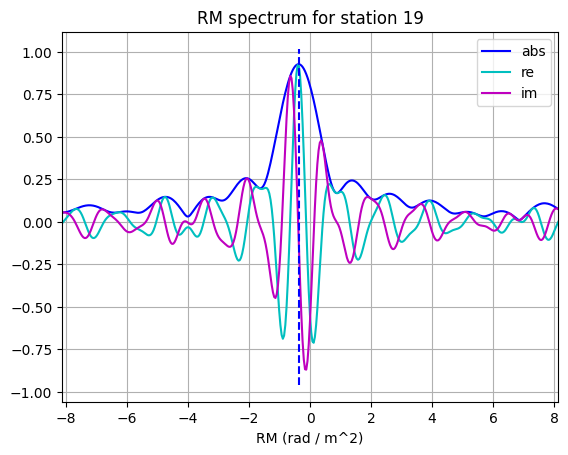

In [2]:
ddir = "/data/EOS_1/mit183"
t0 = perf_counter()
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "hdf5_name": "demo.hdf5",
        "gains": True,
        "leakage": True,
        "rotation": True,
        "wide_channels": True,
    }
)
print(f"pipeline ran in {perf_counter() - t0:.1f} seconds")